# In this project I want to use Transformers on Human Emotions dataset.

### A Vision Transformer (ViT) is a deep learning model that applies the Transformer architecture to visual data, revolutionizing the field of computer vision. 
Unlike traditional convolutional neural networks (CNNs), which have been dominant in vision tasks, Vision Transformers process images as sequences of fixed-size patches, allowing them to capture spatial relationships and long-range dependencies effectively.

# Step 1 | Importing and installing libraries

In [2]:
pip install --upgrade torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 83.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 67.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 3.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 5.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 9.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 8.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 9.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━

In [1]:
import torch 
import torchvision
from torch import nn
from torchvision import transforms
import pytorch_lightning as pl
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt 
from torchmetrics import Accuracy

# Step 2 | Loading and preprocessing the data

In [2]:
train_path = "/kaggle/input/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/train"
test_path = "/kaggle/input/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/test"

In [3]:
batch_size=8

### Step 2.1 | Appling some transforms

In [4]:
data_transform = transforms.Compose([transforms.ToTensor(),  # the image is transformed into a tensor and  the pixel values are scaled between 0.0 and 1.0
                                                 transforms.Normalize((0.5),(0.5)),
                                                 transforms.Resize((224,224))
                                                ])
                                               

### Step 2.2 | Loading train and test datasets

In [5]:
train_set = torchvision.datasets.ImageFolder(train_path, transform=data_transform)

print("Tarin", train_set, "\n")

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0)

Tarin Dataset ImageFolder
    Number of datapoints: 6799
    Root location: /kaggle/input/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
           ) 



In [7]:
test_set = torchvision.datasets.ImageFolder(test_path, transform=data_transform)

print("Test", test_set, "\n")

test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True, num_workers=0)

Test Dataset ImageFolder
    Number of datapoints: 2278
    Root location: /kaggle/input/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
           ) 



### Step 2.3 | Some visualizations

In [8]:
classes = ("angry", "happy", "sad")

In [12]:
data_transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((224,224))]) 
dataset = torchvision.datasets.ImageFolder(train_path, transform=data_transform)

In [13]:
train_iter = iter(dataset)
image, label = next(train_iter)

image.shape, label

(torch.Size([3, 224, 224]), 0)

<class 'numpy.ndarray'>
The image belongs to class :  angry


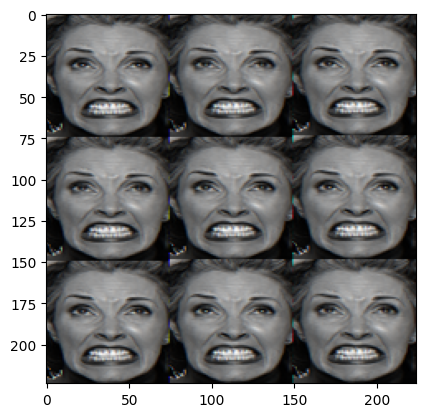

In [14]:
# Visualization
img = image.numpy()
print(type(img))
print("The image belongs to class : ",classes[label])
plt.imshow(img.reshape((224, 224, 3)))

# Step 3 | Vision Transformer



### Key Components 
Patch Embeddings: The input image is divided into fixed-size patches, which are flattened into vectors and projected to obtain patch embeddings. These embeddings serve as the input to the Transformer model.

Transformer Encoder: The Transformer encoder consists of multiple layers, each containing self-attention mechanisms and feed-forward neural networks. Self-attention helps the model capture global dependencies within the image, while feed-forward networks facilitate non-linear transformations.

Positional Encodings: As Transformers do not inherently understand the sequential order of input tokens, positional encodings are added to convey the spatial information of patches within the image.

Classification Head: A classification head is typically appended to the Vision Transformer architecture to perform tasks such as image classification. It takes the output of the Transformer encoder and maps it to class probabilities.

Advantages
Flexible Architecture: Vision Transformers offer a more flexible architecture compared to CNNs, making them suitable for a wide range of tasks beyond image classification, such as object detection and segmentation.

Global Context Understanding: The self-attention mechanism allows Vision Transformers to capture global context and learn dependencies between widely separated image regions, leading to improved performance on tasks requiring long-range spatial reasoning.

Parameter Efficiency: By processing image patches rather than individual pixels, Vision Transformers can be more parameter-efficient, enabling effective learning from limited data and better generalization.

Applications
Image Classification: ViTs have shown competitive performance in image classification benchmarks such as ImageNet, often surpassing or matching the accuracy of CNN-based models.

Object Detection: Vision Transformers have been successfully applied to object detection tasks, demonstrating the ability to detect and localize objects in images effectively.

Semantic Segmentation: ViTs can also be used for semantic segmentation tasks, where they predict the class of each pixel in an image, showcasing their versatility beyond classification tasks.

In conclusion, Vision Transformers represent a groundbreaking approach to handling visual data, offering a unique perspective on image understanding and paving the way for innovative advancements in computer vision research and applications.

### But here I will use ViT for image classification.

# Step 3.1 | Creating a Patcher

### Creating a layer to turn an image into patches is a crucial step in implementing a Vision Transformer model. 
    This process is vital because Vision Transformers operate on fixed-size patches rather than individual pixels. Here are a few reasons why converting the image into patches is essential:

1. **Embedding Spatial Information**: By dividing the image into patches, the Vision Transformer can capture spatial information from different parts of the image. Each patch represents a local region of the image and allows the model to learn relationships between these regions.

2. **Reducing Computations**: Processing the entire image as patches reduces the number of individual elements that the model needs to consider simultaneously, compared to processing the image pixel by pixel. This can help in managing computational resources and improving the model's efficiency.

3. **Facilitating Self-Attention Mechanism**: Vision Transformers rely on self-attention mechanisms to capture global dependencies within the image. Dividing the image into patches enables the self-attention mechanism to attend to different patches and model interactions between them effectively.

4. **Parameter Efficiency**: By converting the image into patches, the model can share parameters across different patches, facilitating parameter efficiency and enabling the model to generalize better to unseen data.

In summary, creating a layer to turn an image into patches is essential for the Vision Transformer to effectively process image data and learn spatial relationships. It is a key component that enables the model to capture both local and global features within an image and leverage the advantages of the self-attention mechanism.

In [15]:
class PatchCreator(nn.Module):
    """
    Creates patches and Flattens them.
    """
    def __init__(self, in_channels:int=3, patch_size:int=16, embedding_dim:int=768):
        super().__init__()
          
        # Step 1 | Creating patches with help of Conv2D layer
        self.patcher = nn.Conv2d(in_channels=in_channels,
                                 out_channels=embedding_dim,
                                 kernel_size=patch_size,
                                 stride=patch_size,   # no patch overlaping
                                 padding=0)
    
    
        # Step 2 | Flattening the patches
        self.flatten = nn.Flatten(start_dim=2, end_dim=3)
    
    
    # Step 3 | Forward method
    def forward(self, x):
        patched = self.patcher(x)
        flattened = self.flatten(patched)
        permuted = flattened.permute(0, 2, 1)  # [batch_size, P^2•C, N] -> [batch_size, N, P^2•C]
        
        return permuted

# Step 3.2 | Creating a MultiheadSelfAttentionBlock

### MultiheadSelfAttentionBlock in Vision Transformers

The `MultiheadSelfAttentionBlock` is a key component in Vision Transformers that enables capturing complex patterns and long-range dependencies in the input image features. This block consists of multiple self-attention heads, each learning distinct attention patterns independently. Here's an explanation of the components of the `MultiheadSelfAttentionBlock`:

1. **Query, Key, Value (QKV)**:
    - In the self-attention mechanism, the input features are linearly transformed into three sets of values: Queries (Q), Keys (K), and Values (V).
    - These are then used to compute the attention weights indicating the importance of different parts of the input.

2. **Multihead Attention**:
    - Multiple sets of Query, Key, and Value projections are created by linear transformations.
    - Each set constitutes a separate "head" of attention that independently computes attention weights.
    - The attention weights from each head are combined to provide a weighted sum of the values, capturing diverse patterns and dependencies.

3. **Normalization and Scaling**:
    - Before and after the self-attention computation, normalization techniques like Layer Normalization or Batch Normalization are applied.
    - Scaling factors like the square root of dimensionality are often used to stabilize the attention weights.

4. **Residual Connections and Feed-Forward Networks**:
    - Residual connections are typically used around the Multihead Self-Attention sub-layer.
    - After the attention computation, a feed-forward network with activation functions like ReLU is applied to further process the features.


In [16]:
class MultiheadSelfAttentionBlock(nn.Module):
    """
    Creates a multi-head self-attention block.
    """
    def __init__(self,
                 embedding_dim=768, num_heads=12, attention_dropout=0): 
        super().__init__()
        
        # Step 1 | Creating the Norm layer 
        self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)
        
        # Step 2 | Creating the Multi-Head Attention (MSA) layer
        self.multihead_attention = nn.MultiheadAttention(embed_dim=embedding_dim,
                                                    num_heads=num_heads,  # from original paper
                                                    dropout=attention_dropout,
                                                    batch_first=True) 
        
    # Step 3 | Forward method
    def forward(self, x):
        x = self.layer_norm(x)
        attention_output, _ = self.multihead_attention(query=x, key=x, value=x, need_weights=False) 
        return attention_output

# Step 3.3 | Creating a MLP Block

## MLP Block in Vision Transformers

The `MLP Block` in Vision Transformers, also known as the Feed-Forward Network (FFN) layer, plays a crucial role in processing the token embeddings and enhancing the model's representation learning capabilities. Here's an explanation of the components of the `MLP Block`:

1. **Linear Transformations**:
   - The input token embeddings are linearly transformed using fully connected layers.
   - These transformations are applied independently to each position/token in the input sequence.

2. **Activation Function (e.g., GeLU, ReLU)**:
    - The original authors of Vision Transformers used the GeLU (Gaussian Error Linear Unit) activation function instead of the ReLU (Rectified Linear Unit) for a specific reason. GeLU is a non-linear activation function that is designed to introduce a smoother non-linearity compared to ReLU. While ReLU has a linear activation for positive inputs and zero activation for negative inputs, GeLU introduces a curve that transitions smoothly at both positive and negative values.

    - The use of GeLU in Vision Transformers was likely motivated by empirical results showing that GeLU can improve the representational power of the model and aid in learning complex patterns in the data. GeLU has been observed to have better gradient propagation properties in deep networks compared to ReLU, which can be beneficial for training deeper Transformer models efficiently.

    - Additionally, GeLU has been shown to perform well on a wide range of tasks and is particularly effective in tasks that require capturing subtle interactions and patterns in the data. By leveraging GeLU in the MLP Block of Vision Transformers, the original authors aimed to enhance the non-linear modeling capabilities of the model and potentially improve its performance on vision tasks.

    - Therefore, the decision to use GeLU instead of ReLU in Vision Transformers was likely driven by the desire to leverage its smooth non-linearity and better gradient propagation properties to enhance the learning capacity and performance of the model on complex visual tasks.
    
   - An activation function like Rectified Linear Unit (ReLU) is commonly used after the linear transformations.
   
   - ReLU introduces non-linearity and enables the model to learn complex patterns in the data.

3. **Residual Connections**:
   - Similar to the Multihead Self-Attention Block, residual connections are often employed around the MLP Block.
   - This helps in mitigating the vanishing gradient problem and enables smoother optimization.

4. **Normalization**:
   - Layer Normalization or other normalization techniques are applied before and after the MLP Block.
   - Normalization helps in stabilizing the training process and improving the convergence of the model.

5. **Dimensionality Reduction**:
   - In some Vision Transformer architectures, a dimensionality reduction technique like bottleneck layers may be used within the MLP Block.
   - This can help in reducing computational complexity while retaining expressive power.

In [17]:
class MLP(nn.Module):
    def __init__(self,
                 embedding_dim=768, # 16*16*3
                 dropout=0.1, # from original paper
                 mlp_size=3072 # from original paper 
                ):
        super().__init__()
        
        # Step 1 | Creating the Norm layer 
        self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)
        
        # Step 2 | Creating the MLP layer
        self.mlp = nn.Sequential(
            nn.Linear(in_features=embedding_dim, out_features=mlp_size),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(in_features=mlp_size, out_features=embedding_dim),
            nn.Dropout(dropout)
        )
        
        
    # Step 3 | Forward method
    def forward(self, x):
        x = self.layer_norm(x)
        x = self.mlp(x)
        return x

# Step 3.4 | Creating the Encoder Block

In [18]:
class ViTEncoderBlock(nn.Module):
    def __init__(self,
                embedding_dim=768,  # 16*16*3
                 num_heads=12,
                mlp_size=3072,
                mlp_dropout=0.1,
                ):
        super().__init__()
        
        # Step 1 | MSA layer 
        self.attentionLayer = MultiheadSelfAttentionBlock(embedding_dim=embedding_dim, 
                                                          num_heads=num_heads)
        # Step 2 | MLP layer 
        self.mlpLayer = MLP(embedding_dim=embedding_dim, 
                            dropout=mlp_dropout, 
                            mlp_size=mlp_size )
        
    # Step 3 | Forward method  
    def forward(self, x):
        x =  self.attentionLayer(x) + x 
        x = self.mlpLayer(x) + x 
        return x

In the `forward()` method, each line corresponds to a specific operation in the TransformerEncoderBlock class. Here's an explanation of each line and the rationale behind using element-wise addition in the residual connections:

1. `x = self.msa_block(x) + x`: This line passes the input `x` through the MultiheadSelfAttentionBlock (`msa_block`) and adds the original input `x` to the output of the attention block. This operation implements the concept of a residual connection, allowing the model to learn residual functions. The addition operation ensures that the original information is preserved and facilitates better gradient flow during training. By adding `x` to the output of the attention block, the model can focus on learning the residual information that needs to be updated rather than completely relearning the representation from scratch.

2. `x = self.mlp_block(x) + x`: This line passes the output from the previous step through the MLPBlock (`mlp_block`) and adds the original input `x` to the output of the MLP block. Similar to the previous line, this operation implements a residual connection to preserve the original information and facilitate gradient flow. The residual connection allows the model to learn residual transformations through the MLP layers while ensuring that the initial representation is retained.

The use of element-wise addition in the residual connections is a common practice in Transformer models to mitigate the vanishing gradient problem and improve the flow of information through the network. By combining the output of the attention and MLP blocks with the original input using addition, the model can effectively learn incremental changes to the input representation, leading to more stable and efficient training.

# Step 3.5 | Vision Transformer(ViT)

In [20]:
class ViT(nn.Module):
    def __init__(self, img_size=224, in_channels=3, patch_size=16, num_transformer_layers=12, 
                 embedding_dim=768, mlp_size=3072, num_heads=12, attn_dropout=0, mlp_dropout=0.1, 
                 embedding_dropout=0.1, num_classes=1000):

        super(ViT, self).__init__()

        assert img_size % patch_size == 0 
        
        self.num_patches = (img_size * img_size) // patch_size**2

        self.class_embedding = nn.Parameter(torch.randn(1, 1, embedding_dim))
        self.position_embedding = nn.Parameter(torch.randn(1, self.num_patches+1, embedding_dim))
        self.embedding_dropout = nn.Dropout(p=embedding_dropout)
        
        self.patch_embedding = PatchCreator(in_channels, patch_size, embedding_dim)
        self.transformer_encoder = nn.Sequential(*[ViTEncoderBlock(embedding_dim, num_heads, mlp_size, mlp_dropout) 
                                                   for _ in range(num_transformer_layers)])
       
        self.classifier = nn.Sequential(
            nn.LayerNorm(embedding_dim),
            nn.Linear(embedding_dim, num_classes)
        )
    
    def forward(self, x):
        batch_size = x.shape[0]
        
        class_token = self.class_embedding.expand(batch_size, -1, -1)
        x = self.patch_embedding(x)
        x = torch.cat((class_token, x), dim=1)
        x = self.position_embedding + x
        x = self.embedding_dropout(x)
        x = self.transformer_encoder(x)
        x = self.classifier(x[:, 0])
        
        return x

The code provided defines a Vision Transformer (ViT) class with the ViT-Base architecture and default hyperparameters. Here's an explanation of each line of the code and the reasons for including them:

1. `batch_size = x.shape[0]`: This line calculates the batch size of the input tensor `x`. Knowing the batch size is essential for handling different batch sizes during processing.

2. `class_token = self.class_embedding.expand(batch_size, -1, -1)`: This line creates the learnable class token embedding and expands it to match the batch size. The class token is used to represent the entire image in the transformer model. Expanding the embedding to match the batch size ensures that each sample in the batch receives the same class token embedding.

3. `x = self.patch_embedding(x)`: This line applies the patch embedding layer to the input image tensor `x`. Patch embedding converts image patches into embeddings that can be processed by the transformer model.

4. `x = torch.cat((class_token, x), dim=1)`: This line concatenates the class token embedding with the patch embeddings along the first dimension. This step combines the global information from the class token with the local patch information to provide a complete input representation for the transformer.

5. `x = self.position_embedding + x`: Here, the position embeddings are added to the combined class and patch embeddings. Position embeddings provide spatial information to the model, helping it learn relationships between different patches in the image.

6. `x = self.embedding_dropout(x)`: This line applies dropout to the combined embeddings. Dropout helps regularize the model by randomly setting elements of the input tensor to zero, preventing overfitting and improving generalization.

7. `x = self.transformer_encoder(x)`: The combined embeddings are passed through multiple Transformer Encoder blocks sequentially. Each block processes the input using self-attention mechanisms and MLP layers to capture global and local dependencies within the image.

8. `x = self.classifier(x[:, 0])`: Finally, the output of the Transformer Encoder blocks is passed through a classifier head to obtain predictions for the input image. The predictions are based on the representation at the first position of the sequence, which corresponds to the class token.

Each line in the code serves a specific purpose, such as preparing the input data, incorporating positional information, applying dropout for regularization, and processing the input through transformer layers. Together, these operations define the ViT model architecture and enable it to learn representations for image classification tasks effectively.

In [21]:
vit = ViT(num_classes=len(classes))

# Step 4 | Training the ViT model

In [22]:
class ViTModel(pl.LightningModule):
    def __init__(self):
        super(ViTModel, self).__init__()
        self.vit = ViT(num_classes=len(classes))
        self.criterion = nn.CrossEntropyLoss()
        self.accuracy = Accuracy(task="multiclass", num_classes=3, top_k=2)

    def forward(self, x):
        return self.vit(x)

    def training_step(self, batch, batch_idx):
        # Extracting image and target from the batch
        x, y = batch

        # Forward pass
        outputs = self(x)

        # Calculating loss
        loss = self.criterion(outputs, y)
        acc = self.accuracy(outputs, y)
        # Log accuracy and loss
        self.log('train_loss', loss, on_epoch=True, on_step=False, prog_bar=True, logger=True)  # Log the loss for each epoch
        self.log('train_acc', acc, on_epoch=True, on_step=False, prog_bar=True, logger=True)    # Log the accuracy for each epoch

        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=0.001)
        return optimizer

In [23]:
model = ViTModel()

trainer = pl.Trainer(
    max_epochs=5,    # Number of epochs to train
)

In [24]:
trainer.fit(model, train_loader, test_loader)

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/configuration_validator.py:68: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

# Step 5 | Conclution

**As we can see the results are not very good and needs to be improved. So I will creat another notebook to use fine-tuning method and see if the results change or not.**